In [1]:
import tejapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
tejapi.ApiConfig.api_key = 'Your Key'
tejapi.ApiConfig.ignoretz = True

# 事件研究

從 2019-01-01 ~ 2021-08-01 期間，上市公司發生的現金增資事件，觀察市場反應

估計期間: -260 ~ -10

事件發生日 (t=0): 公司宣告現金增資

事件期間: -5 ~ +5

In [2]:
#先抓出所有上市公司(普通股)代碼
security = tejapi.get('TWN/ANPRCSTD',
                     mkt = 'TSE',
                     stypenm = '普通股',
                     opts = {'columns':['coid','mdate','stypenm','mkt']},
                     paginate = True,
                     chinese_column_name = True)
tse_stocks = security['證券碼'].tolist()
tse_stocks

['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1507',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 

In [13]:
#選取上市櫃公司所有事件，事件日為 '股東會決議日', 從2019年開始
events = tejapi.get('TWN/ASTK1',
                   x_mt_date = {'gte':'2019-01-01', 'lte':'2021-08-01'},
                   opts = {'columns':['coid','cash','x_mt_date']},
                   paginate = True,
                   chinese_column_name = True)

In [14]:
events

,公司,現金增資(仟股),股東會決議日
None,,,
0,000930,3600,2020-08-20
1,000930,0,2020-08-20
2,1101,0,2019-06-12
3,1101,0,2020-06-09
4,1210,0,2019-05-31
...,...,...,...
1317,9941,0,2021-07-20
1318,9945,0,2020-06-09
1319,9946,0,2019-06-24


In [15]:
#選取現金增資
cash = events[events['現金增資(仟股)']>0].reset_index(drop=True)
cash

,公司,現金增資(仟股),股東會決議日
0,000930,3600,2020-08-20
1,1314,450000,2019-05-24
2,1341,1000,2021-03-11
3,1342,2500,2019-12-12
4,1342,5880,2020-09-23
...,...,...,...
626,8933,80000,2019-06-21
627,8933,50000,2020-10-27
628,8936,20000,2019-06-20
629,9802,10000,2020-04-30


In [16]:
#只選出目前仍為"上市"公司 的現金增資事件
tse_cash = cash[cash['公司'].isin(tse_stocks)].reset_index(drop=True)
tse_cash

,公司,現金增資(仟股),股東會決議日
0,1314,450000,2019-05-24
1,1342,2500,2019-12-12
2,1342,5880,2020-09-23
3,1449,30000,2019-12-19
4,1460,300000,2021-05-04
...,...,...,...
136,8011,20000,2020-08-07
137,8033,3210,2019-06-26
138,8033,20000,2021-04-16
139,8112,50000,2021-03-08


In [17]:
#-5~+5 五因子
final = pd.DataFrame()

for i in range(len(tse_cash)):
    #儲存此股票代碼
    stock = tse_cash.loc[i, '公司']
    #儲存事件發生日
    date = tse_cash.loc[i, '股東會決議日']
    
    #撈取估計期間 & 事件期間 股價(-260 ~ +5)資料 
    return_set = tejapi.get('TWN/APRCD',
                            coid = stock,
                            mdate = {'gte': date + pd.Timedelta(days = -450), 'lte': date + pd.Timedelta(days = 25)}, #確保有涵蓋到-260期~5期交易日 
                            opts = {'columns' : ['coid', 'mdate','roi']},
                            paginate = True,
                            chinese_column_name = True)
    
    
    #跳過無充足資料(ex. 此現金增資為初次上市)，並印出提示
    if len(return_set[return_set['年月日'] == date]) == 0: 
        print(stock +' has no ' + str(date) +' event day return available')
        continue
        
    #觀察執行到哪間公司
    print(stock)
        
    #公告日的 index, 做為切割點                  
    event_index = return_set[return_set['年月日'] == date].index.values.astype(int)[0]
    
    #-260~-10期的報酬(共251期)
    estimate_window = return_set[event_index - 260 - 1: event_index - 10].reset_index(drop=True)
    
    #-5~+5期的報酬(共11期) 
    event_window = return_set[event_index - 5: event_index + 5 + 1].reset_index(drop=True) 
    
    #避免無完整股價資料
    if len(estimate_window) < 251 or len(event_window) < 11:
        print(stock +' has no complete ' + str(date) +' window return available')
        continue
    
    #估計起始日期(-260)
    estimate_start = estimate_window.loc[0, '年月日']
    #事件結束日期(+5)  
    event_end = event_window.loc[5*2, '年月日']  
    
    #先用fama french 五因子模型
    fama_french = tejapi.get('TWN/AFACTO1D',
                        coid = 'Y9999',
                        mdate = {'gte':estimate_start, 'lte': event_end}, #直接抓-260~+5  
                        opts = {'columns': ['coid', 'mdate','mrp','smbn','bp','op','inv']},
                        paginate = True,
                        chinese_column_name = True
                        )
    
    #與估計期間合併,形成OLS估計所需data
    ols_data = estimate_window.merge(fama_french, on = '年月日') 
    x = ols_data.loc[:,['市場風險溢酬', '規模溢酬(5因子)','淨值市價比溢酬','盈利能力因子','投資因子']].values
    y = ols_data['報酬率％'].values.reshape(-1,1)
    #線性回歸(OLS)
    model = LinearRegression()
    model.fit(x,y)
    #與事件期間合併
    predict_data = event_window.merge(fama_french, on = '年月日') 
    #事件期間的因子
    event_x = predict_data.loc[:,['市場風險溢酬','規模溢酬(5因子)','淨值市價比溢酬','盈利能力因子','投資因子']].values
    #計算相關報酬率
    event_window['預期報酬率'] = model.predict(event_x)
    event_window['異常報酬率'] = event_window['報酬率％'] - event_window['預期報酬率'] 
    event_window['累計異常報酬率'] = event_window['異常報酬率'].cumsum()
    
    #加上相對天數,利於之後算分群算平均
    event_window['相對天數'] = [i for i in range(-5, 5 + 1)]   #***
    
    #儲存
    final = final.append(event_window[['證券代碼','異常報酬率','累計異常報酬率','相對天數']]).reset_index(drop=True)

1314
1342 has no 2019-12-12 00:00:00 event day return available
1342 has no 2020-09-23 00:00:00 event day return available
1449
1460
1464
1472
1475 has no 2021-02-09 00:00:00 event day return available
1477
1506 has no 2019-08-09 00:00:00 event day return available
1512
1529
1529
1536
1538
1598
1707
1760
1783
1795
1795
1805
1909
1909
2027
2027
2034
2049
2062
2208
2211 has no 2020-06-18 00:00:00 event day return available
2241 has no 2019-06-13 00:00:00 event day return available
2327
2340
2358
2380
2406
2406
2424
2424
2424
2429
2429
2429
2434
2434
2472
2486
2528
2530
2603
2609
2636
2636
2705
2812
2823
2834
2867
2867
2881
2882
2888
2888
2888
2897
3018
3049
3057
3057
3138 has no 2020-06-02 00:00:00 event day return available
3311
3321
3321
3346
3376
3406
3533
3543 has no 2019-06-11 00:00:00 event day return available
3557
3557
3563
3576
3593
3593
3593
3593
3593
3593
3596
3682
4104
4108
4155
4306
4739
4746
4755
4919
4919
4961
4976
5469
5607
5876
5876 has no complete 2019-06-14 00:00:00 wi

In [18]:
final

,證券代碼,異常報酬率,累計異常報酬率,相對天數
0,1314,-0.404222,-0.404222,-5
1,1314,0.260057,-0.144165,-4
2,1314,0.042305,-0.101860,-3
3,1314,1.051656,0.949796,-2
4,1314,0.052658,1.002455,-1
...,...,...,...,...
1326,8374,-1.477277,-2.808618,1
1327,8374,-1.621264,-4.429882,2
1328,8374,-0.669035,-5.098917,3
1329,8374,0.566352,-4.532565,4


In [26]:
final['證券代碼'].unique()

array(['1314', '1449', '1460', '1464', '1472', '1477', '1512', '1529',
       '1536', '1538', '1598', '1707', '1760', '1783', '1795', '1805',
       '1909', '2027', '2034', '2049', '2062', '2208', '2327', '2340',
       '2358', '2380', '2406', '2424', '2429', '2434', '2472', '2486',
       '2528', '2530', '2603', '2609', '2636', '2705', '2812', '2823',
       '2834', '2867', '2881', '2882', '2888', '2897', '3018', '3049',
       '3057', '3311', '3321', '3346', '3376', '3406', '3533', '3557',
       '3563', '3576', '3593', '3596', '3682', '4104', '4108', '4155',
       '4306', '4739', '4746', '4755', '4919', '4961', '4976', '5469',
       '5607', '6024', '6112', '6142', '6153', '6165', '6177', '6209',
       '6213', '6224', '6225', '6251', '6257', '6289', '6438', '6443',
       '6625', '6668', '8011', '8033', '8112', '8374'], dtype=object)

In [19]:
sorted_data = final.groupby(by = '相對天數').mean().reset_index()
sorted_data

,相對天數,異常報酬率,累計異常報酬率
0,-5,-0.022137,-0.022137
1,-4,-0.325737,-0.347874
2,-3,0.078696,-0.269178
3,-2,0.088196,-0.180982
4,-1,0.044076,-0.136906
5,0,-0.090756,-0.227662
6,1,-0.772837,-1.000499
7,2,-0.583252,-1.583752
8,3,-0.131390,-1.715142
9,4,-0.249155,-1.964297


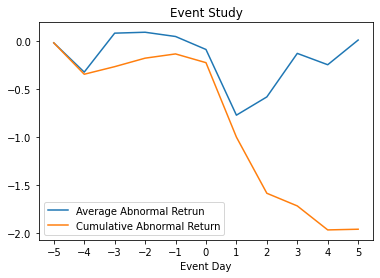

In [20]:
plt.plot(sorted_data['相對天數'], sorted_data['異常報酬率'], label = 'Average Abnormal Retrun')
plt.plot(sorted_data['相對天數'], sorted_data['累計異常報酬率'], label = 'Cumulative Abnormal Return')
plt.xlabel('Event Day')
plt.title('Event Study')
plt.xticks(np.arange(-5, 5+1 , 1)) 
plt.legend()
plt.show()

In [21]:
ttest = pd.DataFrame()
for day in range(-5,5+1):
    sample = final[final['相對天數'] == day]['異常報酬率'].values
    t, p_value = stats.ttest_1samp(sample, 0)
    if p_value <= 0.01:
        significance = '***'
    elif 0.01 < p_value <= 0.05:
        significance = '**'
    elif 0.05 < p_value <= 0.1:
        significance = '*'
    else:
        significance = ''  
    ttest = ttest.append(pd.DataFrame(np.array([day,t,p_value, significance]).reshape((1,4)), columns = ['相對天數','T檢定值', 'P-value','顯著水準'],)).reset_index(drop=True)

In [22]:
ttest = ttest.set_index('相對天數')
ttest

,T檢定值,P-value,顯著水準
相對天數,,,
-5,-0.10081364751354623,0.9198666379741406,
-4,-1.6997027196118908,0.09177757168692494,*
-3,0.33653171092945117,0.7370577392271509,
-2,0.36831698139505437,0.713285826893604,
-1,0.18384177133226626,0.8544478783093545,
0,-0.3654665666333174,0.7154065602118874,
1,-2.9738789468146734,0.0035554406388253776,***
2,-2.0769571590457723,0.03993943144211567,**
3,-0.4950433242204188,0.6214747664429557,
